In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn import linear_model

In [14]:
data = pd.read_csv('fitbod_WHAWKINS_20191029-143839.csv')

In [15]:
data.head(5)
#Preliminary Data Scan

,singleSetId,weight,reps,distance,duration,elevationGain,setNumber,exerciseSetParseId,exerciseName,workoutId,workoutDate,fake_user_id
0,z83zJRBfSp,125.0,8.0,NaN,NaN,NaN,3,QfAaTjZ3v6,Seated Back Extension,c6J6ysvb92,2017-02-15,fake_id_409
1,2O56j9vrss,0.0,10.0,NaN,NaN,NaN,4,2teBRWJpfh,Jackknife Sit-Up,UVfntrVxza,2016-12-17,fake_id_409
2,FU8ucj5AGy,0.0,12.0,NaN,NaN,NaN,3,LRJF4cbQc5,Decline Reverse Crunch,5FCw94ZFqt,2016-12-20,fake_id_409
3,wFxF45dKxJ,167.0,14.0,NaN,NaN,NaN,4,YVjA3SVe4Q,Sit Up,OTd45eGqie,2017-01-05,fake_id_410
4,ulaeQ8IRw8,22.5,7.0,NaN,NaN,NaN,1,tehh7FQEUC,Dumbbell Lateral Raise,f2ENGz61Ly,2017-01-11,fake_id_410


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22359 entries, 0 to 22358
Data columns (total 12 columns):
singleSetId           22359 non-null object
weight                22359 non-null float64
reps                  22359 non-null float64
distance              19802 non-null float64
duration              19802 non-null float64
elevationGain         19802 non-null float64
setNumber             22359 non-null int64
exerciseSetParseId    22359 non-null object
exerciseName          22355 non-null object
workoutId             22359 non-null object
workoutDate           22359 non-null object
fake_user_id          22359 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 2.0+ MB


In [17]:
data.shape

(22359, 12)

In [18]:
data.describe()
#We're prescribing 11 sets of somthing? Check that out at some point... Maybe it's some sort of HIIT

,weight,reps,distance,duration,elevationGain,setNumber
count,22359.000000,22359.000000,19802.000000,19802.000000,19802.000000,22359.000000
mean,33.466214,10.266023,63.204014,25.387602,0.000424,2.484324
std,39.464208,5.978327,851.844955,668.525594,0.030634,1.379476
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.535929,7.000000,0.000000,0.000000,0.000000,1.000000
50%,20.411681,10.000000,0.000000,0.000000,0.000000,2.000000
75%,49.895220,12.000000,0.000000,0.000000,0.000000,3.000000
max,362.874328,95.000000,86904.576000,90020.000000,3.048000,11.000000


In [19]:
#Figuring out what these ID's mean

print(len(data.singleSetId.unique()))
print(len(data.exerciseSetParseId.unique()))
print(len(data.workoutId.unique()))
print(len(data.workoutDate.unique()))
print(len(data.fake_user_id.unique()))

22343
6499
1102
607
20


In [20]:
id_test = data['exerciseSetParseId'] == "QfAaTjZ3v6"
print(data[id_test])
#Confirming that I understand the different ID's
# If 4 sets of any given exercise are assigned, that block of sets will have one exerciseSetParseID

      singleSetId  weight  reps  distance  duration  elevationGain  setNumber  \
0      z83zJRBfSp   125.0   8.0       NaN       NaN            NaN          3   
5206   wuGAboCm5x   125.0   8.0       NaN       NaN            NaN          1   
13048  nt6ttsLKCH   125.0   8.0       NaN       NaN            NaN          4   
15265  WyfIpjzqGd   125.0   8.0       NaN       NaN            NaN          2   

      exerciseSetParseId           exerciseName   workoutId workoutDate  \
0             QfAaTjZ3v6  Seated Back Extension  c6J6ysvb92  2017-02-15   
5206          QfAaTjZ3v6  Seated Back Extension  c6J6ysvb92  2017-02-15   
13048         QfAaTjZ3v6  Seated Back Extension  c6J6ysvb92  2017-02-15   
15265         QfAaTjZ3v6  Seated Back Extension  c6J6ysvb92  2017-02-15   

      fake_user_id  
0      fake_id_409  
5206   fake_id_409  
13048  fake_id_409  
15265  fake_id_409  


In [21]:
print(data.exerciseName.unique())

#What exercises are used in this data set?



['Seated Back Extension' 'Jackknife Sit-Up' 'Decline Reverse Crunch'
 'Sit Up' 'Dumbbell Lateral Raise' 'Olympic Squat' 'Incline Dumbbell Curl'
 'Dumbbell Incline Fly' 'Dumbbell Curl' 'Lunge' 'Exercise Ball Crunch'
 'Smith Machine Bench Press' 'Flutter Kicks' 'Dumbbell Step Up'
 'Running - Treadmill' 'Glute Ham Raise' 'Tricep Push Up'
 'Hanging Knee Raise' 'Biceps Curl To Shoulder Press' 'Decline Crunch'
 'Preacher Curl' 'Machine Leg Press' 'Reverse Lunge'
 'Machine Shoulder Press' 'Chin Up' 'Dumbbell Floor Press'
 'Leg Raises with Stability Ball' 'Barbell Decline Bench Press'
 'Concentration Curl' 'Incline Push Up' 'Floor Press' 'Wide Grip Pull Up'
 'Hanging Leg Raise' 'Hammerstrength High Row' 'Running'
 'Medicine Ball Slam' 'Oblique Crunch' 'Stiff-Legged Barbell Good Morning'
 'Landmine Squat to Press' 'Front Plate Raise' 'Barbell Step Up'
 'Snatch-Grip Deadlift' 'Reverse Crunch' 'Machine Tricep Dip'
 'Reverse Grip Barbell Bent Over Row' 'Dumbbell Bent Over Row'
 'TRX Tricep Extensi

In [22]:
mean_weight_exercise_collapsed = data.groupby(['fake_user_id']).mean()
print(mean_weight_exercise_collapsed)
print(len(mean_weight_exercise_collapsed))
# I have 20 users data


                  weight       reps    distance    duration  elevationGain  \
fake_user_id                                                                 
fake_id_409    21.472206  10.191444   13.645965    5.906987       0.000492   
fake_id_410   115.608827   9.723096         NaN         NaN            NaN   
fake_id_411    13.040678  11.979661         NaN         NaN            NaN   
fake_id_412    38.654996  10.427067   77.354134   20.288073       0.000527   
fake_id_413    29.504125   9.555385  134.590677   39.910769       0.000000   
fake_id_414    42.611198  10.721614    4.777015    1.435159       0.000000   
fake_id_415    17.152985  11.963184    0.000000    0.000000       0.000000   
fake_id_416    13.861297  10.418139  126.832988  115.023557       0.000000   
fake_id_417    41.815287   9.464356   40.544315   13.490594       0.000000   
fake_id_418    12.322354   9.859060    0.000000    0.000000       0.000000   
fake_id_419    32.040179  10.125991  146.217670   69.397914     

In [23]:
### Research Question... Through talking with the user experience department at Fitbod I've learned that a massive
# subset of our users are using Fitbod because they are power lifters trying to improve Bench Press, Squat and Deadlift
# max values. I'm going to perform an EDA to explore how weights and repititions are being assigned for those lifts 
# to better understand how we prescribe exercise and if it's optimal for our power lifters.
# I'm also going to create a new data column "training volume" which is the summation of all repititions of an
# exercise multiplied times the ammount of weight used
# I'm going to assess the efficacy of weight and total repititions for inclusion in a random forest for classification
# of training volume. If the R squared isn't 1.0 I messed somthing up ;)
# I'm attaching two papers which guided my thoughts in forming the research question and could be useful in 
# improving the Volume Prescription Engine

In [24]:
# Find mean values of each lift for each user collapsed across all workouts
squat_df = data.loc[data['exerciseName'] == 'Olympic Squat',['singleSetId', 'weight', 'setNumber', 'fake_user_id', 'reps']]
bench_df = data.loc[data['exerciseName'] == 'Barbell Bench Press',['singleSetId', 'weight', 'setNumber', 'fake_user_id', 'reps']]
deadlift_df = data.loc[data['exerciseName'] == 'Deadlift',['singleSetId', 'weight', 'setNumber', 'fake_user_id', 'reps']]
#print(squat_df)
print(deadlift_df)
#print(bench_df)

      singleSetId      weight  setNumber fake_user_id  reps
199    BKLN71xoM4  195.000000          2  fake_id_410   5.0
200    YWUgrYYCyI   83.914688          5  fake_id_426   1.0
201    4zJ1D6Kweh  142.881766          7  fake_id_422   5.0
438    bS0eDSTZxB   34.019468          3  fake_id_409   8.0
439    0O4YoDH1Yg   20.000000          1  fake_id_412   8.0
...           ...         ...        ...          ...   ...
22043  oXv1gNM4yy   83.914688          2  fake_id_422   3.0
22294  k2Tk23Hzos  135.000000          6  fake_id_412   6.0
22295  Ln4mWgov4P   30.000000          1  fake_id_411  10.0
22296  WubhZ5ywqr  185.000000          2  fake_id_410   4.0
22297  9F4sPST35a  147.417696          6  fake_id_422   5.0

[394 rows x 5 columns]


In [25]:
mean_squat = squat_df.groupby(['fake_user_id']).mean()
mean_bench = bench_df.groupby(['fake_user_id']).mean()
mean_deadlift = deadlift_df.groupby(['fake_user_id']).mean()
print(len(mean_squat))
print(len(mean_bench))
print(len(mean_deadlift))

#print(mean_bench)
# Of my twenty users only 4, 11, 12 have performed the Olympic Squat and Barbell Bench Press, Deadlift, respectively
# This ended up being rendundant due to .describe()

4
14
12


In [26]:
mean_squat.describe()
# Squat Descriptive Statistics

,weight,setNumber,reps
count,4.000000,4.000,4.000000
mean,69.467623,3.375,6.375595
std,27.788959,0.750,1.474154
min,39.851377,2.500,4.714286
25%,48.745038,2.875,5.357143
50%,71.926224,3.500,6.494048
75%,92.648810,4.000,7.512500
max,94.166667,4.000,7.800000


In [27]:
mean_bench.describe()
# Bench Descriptive Statistics


,weight,setNumber,reps
count,14.000000,14.000000,14.000000
mean,62.739470,2.956461,7.274504
std,41.599508,0.850072,1.953798
min,25.000000,2.000000,4.440000
25%,35.289528,2.000000,5.720200
50%,57.143709,3.034925,7.194306
75%,72.574866,3.758877,8.730000
max,187.777778,4.305556,10.000000


In [28]:
mean_deadlift.describe()
# Deadlift Descriptive Statistics


,weight,setNumber,reps
count,12.000000,12.000000,12.000000
mean,82.684219,3.114383,7.255992
std,40.189045,0.779022,1.854492
min,30.000000,2.000000,4.000000
25%,58.891198,2.437500,6.031250
50%,72.130722,3.127820,7.009166
75%,103.578972,3.806250,8.375000
max,182.916667,4.227273,10.000000


(array([5., 2., 4., 2., 0., 0., 0., 0., 0., 1.]),
 array([ 25.        ,  41.27777778,  57.55555556,  73.83333333,
         90.11111111, 106.38888889, 122.66666667, 138.94444444,
        155.22222222, 171.5       , 187.77777778]),
 <a list of 10 Patch objects>)

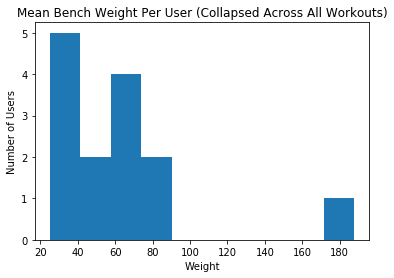

In [29]:
# Mean Bench Press Weight Distributions
num_bins=10
plt.title('Mean Bench Weight Per User (Collapsed Across All Workouts)')
plt.xlabel('Weight')
plt.ylabel('Number of Users')
plt.hist(mean_bench['weight'],num_bins)

#I'm guessing these weights are in KG's... 


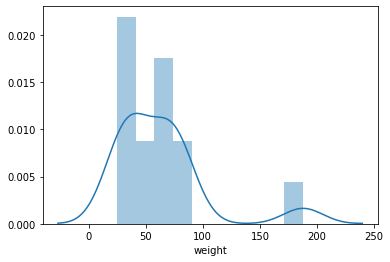

In [30]:
# Probability Density Function- Bench Weight
sns.distplot(mean_bench['weight'],bins=num_bins)

(array([2., 1., 2., 1., 1., 1., 2., 0., 1., 3.]),
 array([ 4.44 ,  4.996,  5.552,  6.108,  6.664,  7.22 ,  7.776,  8.332,
         8.888,  9.444, 10.   ]),
 <a list of 10 Patch objects>)

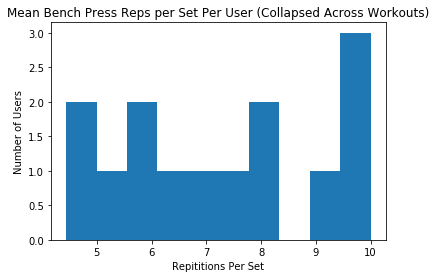

In [31]:
# Bench Press Reps Per Set Distribution
plt.title('Mean Bench Press Reps per Set Per User (Collapsed Across Workouts)')
plt.xlabel('Repititions Per Set')
plt.ylabel('Number of Users')
plt.hist(mean_bench['reps'],num_bins)

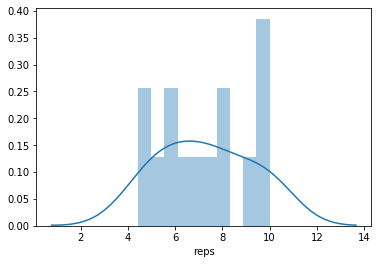

In [32]:
# Probability Density Function- Reps Per Set Bench
sns.distplot(mean_bench['reps'],bins=num_bins)

(array([1., 0., 1., 0., 0., 0., 0., 0., 0., 2.]),
 array([39.85137704, 45.28290601, 50.71443497, 56.14596393, 61.57749289,
        67.00902185, 72.44055082, 77.87207978, 83.30360874, 88.7351377 ,
        94.16666667]),
 <a list of 10 Patch objects>)

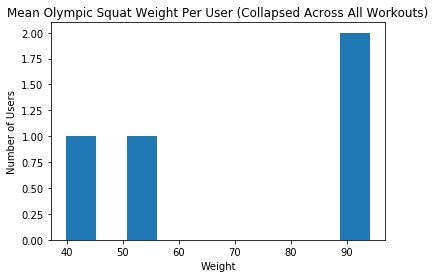

In [33]:
# Visualization of Mean Olympic Squat Weight Distribution
num_bins=10
plt.title('Mean Olympic Squat Weight Per User (Collapsed Across All Workouts)')
plt.xlabel('Weight')
plt.ylabel('Number of Users')
plt.hist(mean_squat['weight'],num_bins)

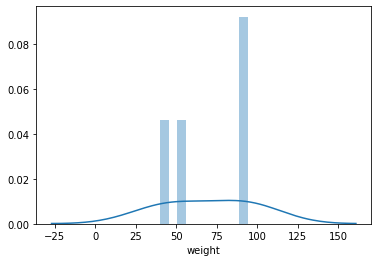

In [34]:
# Probability Density Function- Squat Weight
sns.distplot(mean_squat['weight'],bins=num_bins)

(array([2., 1., 2., 1., 1., 1., 2., 0., 1., 3.]),
 array([ 4.44 ,  4.996,  5.552,  6.108,  6.664,  7.22 ,  7.776,  8.332,
         8.888,  9.444, 10.   ]),
 <a list of 10 Patch objects>)

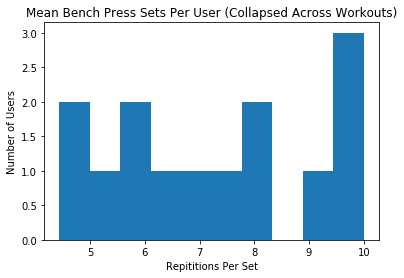

In [35]:
# Mean Olympic Squat Reps Per Set Distribution
plt.title('Mean Bench Press Sets Per User (Collapsed Across Workouts)')
plt.xlabel('Repititions Per Set')
plt.ylabel('Number of Users')
plt.hist(mean_bench['reps'],num_bins)


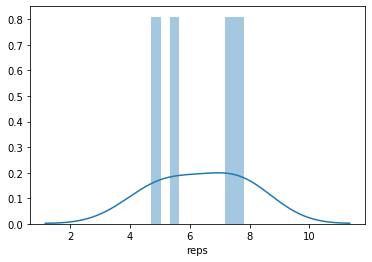

In [36]:
# Probability Density Function- Reps Per Set Olympic Squat
sns.distplot(mean_squat['reps'],bins=num_bins)

(array([1., 5., 0., 2., 1., 2., 0., 0., 0., 1.]),
 array([ 30.        ,  45.29166667,  60.58333333,  75.875     ,
         91.16666667, 106.45833333, 121.75      , 137.04166667,
        152.33333333, 167.625     , 182.91666667]),
 <a list of 10 Patch objects>)

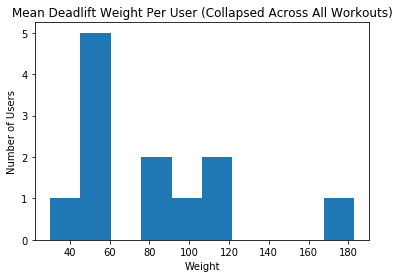

In [37]:
# Mean Deadlift Weight Distributions
num_bins=10
plt.title('Mean Deadlift Weight Per User (Collapsed Across All Workouts)')
plt.xlabel('Weight')
plt.ylabel('Number of Users')
plt.hist(mean_deadlift['weight'],num_bins)

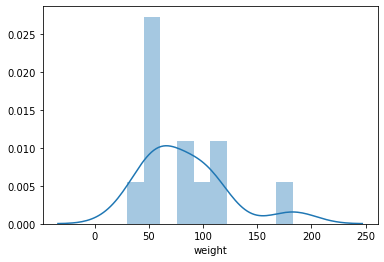

In [38]:
# Probability Density Function- Deadlift Weight
sns.distplot(mean_deadlift['weight'],bins=num_bins)

(array([1., 0., 1., 2., 2., 2., 1., 0., 0., 3.]),
 array([ 4. ,  4.6,  5.2,  5.8,  6.4,  7. ,  7.6,  8.2,  8.8,  9.4, 10. ]),
 <a list of 10 Patch objects>)

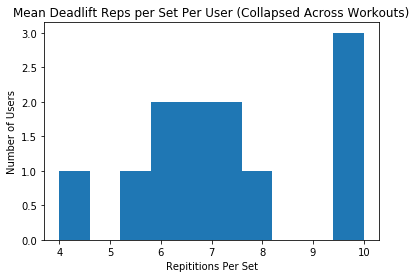

In [39]:
# Deadlift Reps Per Set Distribution
plt.title('Mean Deadlift Reps per Set Per User (Collapsed Across Workouts)')
plt.xlabel('Repititions Per Set')
plt.ylabel('Number of Users')
plt.hist(mean_deadlift['reps'],num_bins)

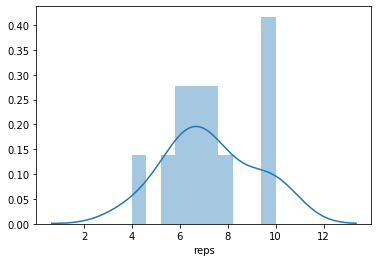

In [40]:
# Probability Density Function- Reps Per Set Deadlift
sns.distplot(mean_deadlift['reps'],bins=num_bins)

In [41]:
# Analyses reveal that mean sets prescribed are in line with optimal prescription practices...
# Given that my analyses are limited by the fact that I collapsed data across all time points.
# My analyses aren't sensitive to the fact that I may be dealing with periodized programs because I collapsed across time
# For example, hypertrophy is important for increasing 1 rep max and it requires higher volume lifting
# That's why power lifters still do sets with high volume as part of a periodized program
# That said...
# I believe that the prescribed/logged workouts are too low weight/high volume for increasing 1-RM's for the power lifts
# To better understand if Fitbod is correctly prescribing for power lifters I need some sort of exercise intensity data
# This is generally carried out by normalizing weight to a percentage of 1 repitition maximum for any given exercise
# If I had cleaner data I could estimate this value using well studied formulas that take 3, 5 or 8 rep max as an input
# Perhaps you have users log their 1 RM? If not it might not be a bad idea to have a periodic bench mark test that
# Can be used to estimate 1 rep max for the purpose of quantifying exercise intensity as a percentage of 1 RM

# Another cool option would be to ingest accelerometer data from hardware devices.
# The basic idea is that people generally move the bar as fast as they can for all loads above 65% of 1 RM
# This allows bar bell velocity to be a great metric of intensity/exertion
# This could be as simple as using fitness tracker API's to ingest barbell velocity data(I know it's not actually simple ;) 
# because the wrist moves at the same speed as the bar
# Fitbod could also generate this data be using an inexpensive IoT accelerometer that clips onto the barbell
# One could also use this data to generate crude power estimates. This is becoming popular with products like
# Elite Form, Perch, Tendo and Sparta Science becoming more and more affordable and available

### Major Limitations of my Analyses
# I collapsed across workouts... I wasn't able to capture the periodization scheme of the lifting program
# I only captured the three power lifts and common varients of each exercise were not analyzed
# I could have analyzed these data but for the sake of brevity I did not 
# I went ahead and added this data to new df... Just to document my logic
all_squat_exercises_df = data.loc[data['exerciseName'].str.contains('Squat', na=False)]
print(all_squat_exercises_df.head(5))


    singleSetId     weight  reps  distance  duration  elevationGain  \
5    B5CByRpQH3  95.000000   7.0       NaN       NaN            NaN   
40   S9L3gdEtTP  20.411681   8.0       0.0       0.0            0.0   
92   C4NSMfF8YR  15.875752   8.0       0.0       0.0            0.0   
103  qiLD1et8CV  10.000000  15.0       0.0       0.0            0.0   
123  58YOWjAdlM   9.071858  12.0       0.0       0.0            0.0   

     setNumber exerciseSetParseId             exerciseName   workoutId  \
5            4         errvOcZYZL            Olympic Squat  PMHayGiqkq   
40           2         0r6BHpF8BC  Landmine Squat to Press  pXJdNTgxi7   
92           2         hez1siw7yN           Dumbbell Squat  7tun2TDY5v   
103          3         NtqtJk1FCV           Dumbbell Squat  6QHny2A13i   
123          2         7iUPGZBkBo    Bulgarian Split Squat  LhDVcpKjQG   

    workoutDate fake_user_id  
5    2016-09-23  fake_id_410  
40   2019-09-03  fake_id_419  
92   2018-09-24  fake_id_417  
103 

In [82]:
### Actionables from data
# To better understand if Fitbod is correctly prescribing for power lifters I need some sort of
# exercise intensity data
# This is generally carried out by normalizing weight to a percentage of 1 repitition maximum for any given exercise
# It would be very helpful to have 1RM data whether true or estimated using well validated regression models
# If we don't already have this we should prompt users to report or create a benchmark test like Crossfits 
# "Crossfit Total" to allow us to generate 1RM and track how it changes over time to utelize it as a covariate in
# prescription of exercise as well as assesment of the success of our prescription engine
# Another usefull variable is total training volume for each lift. Training volume is a handy metric that is ALWAYS cited in 
# research studies in order to normalize for total work when comparing different training methodologies
# If Fitbod ever did A/B testing to see which internal prescription methology worked best this would be a VERY important
# variable to keep consistent between groups

squat_df['totalReps'] = squat_df['reps']*squat_df['setNumber']
bench_df['totalReps'] = bench_df['reps']*bench_df['setNumber']
squat_df['trainingVolume'] = squat_df['totalReps']*squat_df['weight']
bench_df['trainingVolume'] = bench_df['totalReps']*bench_df['weight']


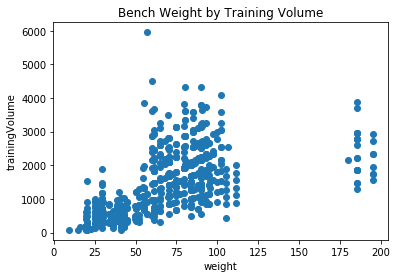

In [105]:
# Identification of variables to consideration in random forest analyses for training volume classification
plt.xlabel('weight')
plt.ylabel('trainingVolume')
plt.title('Bench Weight by Training Volume')
plt.scatter(bench_df.weight,bench_df.trainingVolume)
# Distribution is linear 

In [96]:
# performing linear regression on each variable (I only did one for brevity)
reg = linear_model.LinearRegression()
reg.fit(bench_df[['weight']],bench_df.trainingVolume)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
# slope
reg.coef_


array([15.84125157])

In [98]:
# y int
reg.intercept_

339.82071682181004

In [112]:
# 33% of variance in training volume can be explained by weight... since training volume is weight * total reps that 
# multiple regression would have an R squared of 1
reg.score(bench_df[['weight']],bench_df.trainingVolume)

0.32718151392203887

In [116]:
# Adding all variables that I think may be associated with training volume to multiple regression prior to random
# forest
reg2 = linear_model.LinearRegression()
reg2.fit(bench_df[['weight','totalReps']],bench_df.trainingVolume)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
# multiple linear regression slopes
reg2.coef_

array([15.13564579, 61.88721596])

In [118]:
# multiple linear regression y int
reg2.intercept_

-888.1603398495217

In [124]:
# R squared = .90 thought it would be closer to 1.0... I need to read into sklearn to see what R2 correction they use
reg2.score(bench_df[['weight','totalReps']],bench_df.trainingVolume)

0.9043672799141746

In [ ]:
# These correlations suggest that weight and total reps are valuable variables to include in a random forests model 
# for the classification of trainingVolume
# I didn't perform this analysis due to time constraints and the fact that I've never run one. That said, I read a lot
# of Medium articles and watch a lot of youtube data science videos... If I flipped through the sklearn documentation
# I could quickly figure it out and start building my own models...